# **TF-IDF**

## Importing Necessary Libraries

Import required libraries such as pandas, numpy, matplotblib, nltk, seaborn, and sklearn.

In [2]:
# from sklearn.preprocessing import LabelEncoder
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, feature_selection, metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
import lightgbm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Read Data

Reads the provided dataset (read .jsonl files) from pandas library, after that displays the top data using df.head(), as shown below the dataset has 4 text,label,	model,	source and	id

In [1]:
!pip install scikit-learn
!pip install --upgrade gdown
!gdown --folder https://drive.google.com/drive/folders/1CAbb3DjrOPBNm0ozVBfhvrEh9P9rAppc
!rm -rf /content/SubtaskA/subtaskA_dev_multilingual.jsonl
!rm -rf /content/SubtaskA/subtaskA_train_multilingual.jsonl

Retrieving folder contents
Processing file 1e_G-9a66AryHxBOwGWhriePYCCa4_29e subtaskA_dev_monolingual.jsonl
Processing file 123UQ92LxtHaVTbNYlmjnG1CWwD-x7wDL subtaskA_dev_multilingual.jsonl
Processing file 1HeCgnLuDoUHhP-2OsTSSC3FXRLVoI6OG subtaskA_train_monolingual.jsonl
Processing file 13-9-DakCeLFbPgCiVIU0v6_BCQx0ppz6 subtaskA_train_multilingual.jsonl
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1e_G-9a66AryHxBOwGWhriePYCCa4_29e
To: /content/SubtaskA/subtaskA_dev_monolingual.jsonl
100% 10.8M/10.8M [00:00<00:00, 23.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=123UQ92LxtHaVTbNYlmjnG1CWwD-x7wDL
To: /content/SubtaskA/subtaskA_dev_multilingual.jsonl
100% 21.2M/21.2M [00:00<00:00, 40.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1HeCgnLuDoUHhP-2OsTSSC3FXRLVoI6OG
From (redirected): https://drive.google.com/uc?id=1HeCgnLuDoUHhP-2OsTSSC3FXRLVoI

In [28]:
import json
import pandas as pd
with open('/content/SubtaskA/subtaskA_train_monolingual.jsonl') as f:
    data = [json.loads(line) for line in f]
df = pd.DataFrame(data)

with open('/content/SubtaskA/subtaskA_dev_monolingual.jsonl') as f:
    val_data = [json.loads(line) for line in f]
val_df = pd.DataFrame(val_data)
# ax = sns.countplot(x="label", data=df)

In [29]:
df.head()

,text,label,model,source,id
0,Forza Motorsport is a popular racing game that...,1,chatGPT,wikihow,0
1,Buying Virtual Console games for your Nintendo...,1,chatGPT,wikihow,1
2,Windows NT 4.0 was a popular operating system ...,1,chatGPT,wikihow,2
3,How to Make Perfume\n\nPerfume is a great way ...,1,chatGPT,wikihow,3
4,How to Convert Song Lyrics to a Song'\n\nConve...,1,chatGPT,wikihow,4


## Exploratory Data Analysis (EDA)

EDA to see if there are missing values, checking classes in the category column and seeing the distribution of data from each class. From the dataset, it can be seen that there are 5 categories available, namely Human, chatGPT, davinci, dolly and cohere. After that, check for missing values ​​using the isnull() function from pandas and get 0 null values ​​from the column news title and category

In [30]:
print(f"The dataset contains { df.label.unique() } unique categories")

The dataset contains [1 0] unique categories


In [31]:
print(df.isnull().sum()) #checking for total null values

text      0
label     0
model     0
source    0
id        0
dtype: int64


## Visualization Data

The next step in EDA is to visualize the data in the form of circles and barcharts, to see how much data is distributed from each category and the results are: Human-written text has a total data of 52.9% of the entire dataset, the second is the machine-written text category of 47.1% data from the whole dataset. (In machine-written there are 4 more LLM model category davinci 12%, chatGPT 12%, dolly 11.7%, cohere 11.4%)

label
0    63351
1    56406
Name: count, dtype: int64


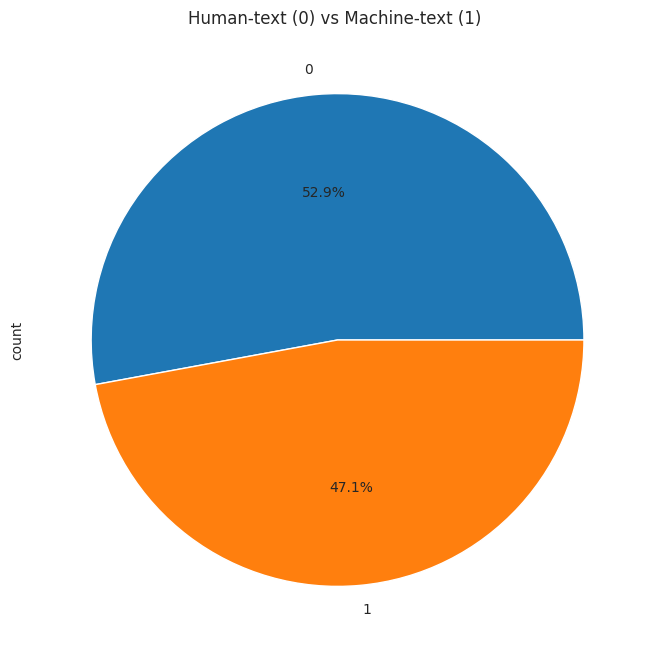

model
human      63351
davinci    14343
chatGPT    14339
dolly      14046
cohere     13678
Name: count, dtype: int64


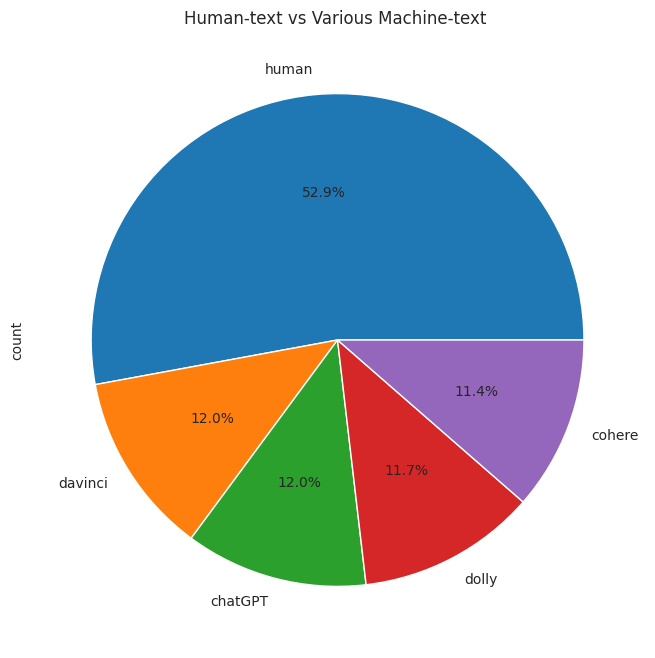

In [32]:
import matplotlib.pyplot as plt

# Create a pie chart with labels from the 'label' column
plt.figure(figsize=(8, 8))
print(df['label'].value_counts())
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Human-text (0) vs Machine-text (1) ')
plt.show()

f, ax = plt.subplots(1, 1, figsize=(8, 8))
print(df.model.value_counts())

df.model.value_counts().plot.pie(explode=[0] * len(df.model.value_counts()), autopct='%1.1f%%', ax=ax)#, shadow=True)
plt.title('Human-text vs Various Machine-text ')
plt.show()



## Visualization Data with WordCloud

Next, display the data using the wordcloud library to see what words often appear in each class.

Machine_text WordCloud


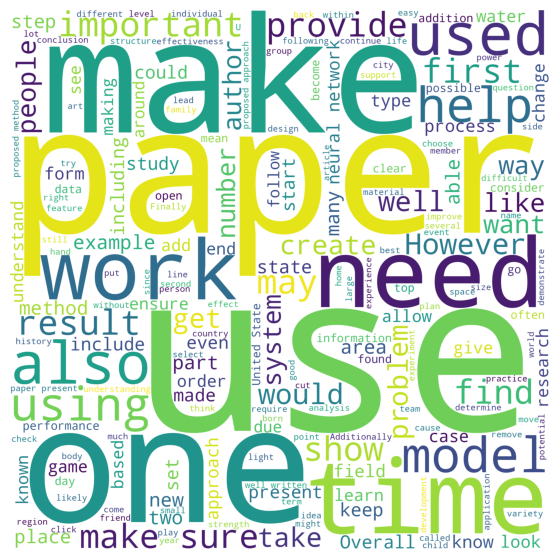

Human_text WordCloud


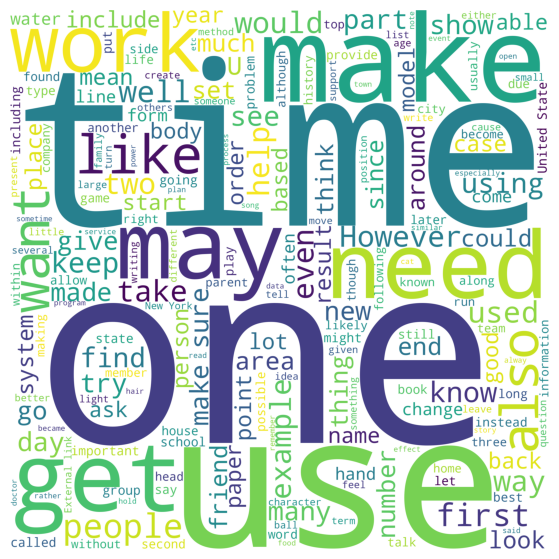

In [33]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))


Machine_text = df[df['label'] == 1]
Machine_text = Machine_text['text']
Human_text = df[df['label'] == 0]
Human_text = Human_text['text']

def wordcloud_draw(dataset, color = 'white'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()

    if (word != 'news' and word != 'text')])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    plt.show()
print("Machine_text WordCloud")
wordcloud_draw(Machine_text, 'white')
print("Human_text WordCloud")
wordcloud_draw(Human_text, 'white')


## Text Preprocessing

text are cleaned using the custom function, remove punctuation, tokenizing, stop words, stemming, lemmitiasation using the nltk library

In [41]:
from nltk.stem import PorterStemmer
sw = stopwords.words('english')

def clean_text(text):

    text = text.lower()

    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Removing URLs

    html=re.compile(r'<.*?>')

    text = html.sub(r'',text) #Removing html tags

    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations

    text = [word.lower() for word in text.split() if word.lower() not in sw]

    text = " ".join(text) #removing stopwords

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis

    return text

df['text_clean'] = df['text'].apply(lambda x: clean_text(x))
val_df['text_clean'] = val_df['text'].apply(lambda x: clean_text(x))
df.head()

,text,label,model,source,id,text_clean
0,Forza Motorsport is a popular racing game that...,1,chatGPT,wikihow,0,forza motorsport popular racing game provides ...
1,Buying Virtual Console games for your Nintendo...,1,chatGPT,wikihow,1,buying virtual console games nintendo wii fun ...
2,Windows NT 4.0 was a popular operating system ...,1,chatGPT,wikihow,2,"windows nt popular operating system back day, ..."
3,How to Make Perfume\n\nPerfume is a great way ...,1,chatGPT,wikihow,3,make perfume perfume great way enhance persona...
4,How to Convert Song Lyrics to a Song'\n\nConve...,1,chatGPT,wikihow,4,convert song lyrics song converting song lyric...


## Split Dataset

Split the dataset into train and test with a comparison of 70:30, 70% of the dataset for the training process and 30% for the testing process, for variable X = text and variable y (destination) = label

In [42]:
# split dataset
df_train, df_test = model_selection.train_test_split(df, test_size=0.3)
# get target
y_train = df_train["label"].values
y_test = df_test["label"].values


#validation set
val_text = val_df['text_clean'].values
val_label = val_df['label'].values

## BoW (Bag of Words)

Next, change the sentence in the text into a vector (number) to make it easier for the computer to recognize patterns using the TF-IDF algorithm, for example word = "new york" when vectorized using TF-IDF becomes 5939

In [39]:
# Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [45]:
corpus = df_train["text_clean"].values
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

In [46]:
len(val_df)

5000

In [47]:
word = "new york"
dic_vocabulary[word]

5941

## Feature Engineering

After converting text to vector, then it is inputted into X variable as a feature which the machine will learn the pattern.

In [48]:
from sklearn.feature_selection import chi2
y = df_train["label"]
X_names = vectorizer.get_feature_names_out()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    dtf_features = pd.concat([dtf_features, pd.DataFrame(
                   {"feature":X_names, "score":1-p, "label":cat})])
    dtf_features = dtf_features.sort_values(["label","score"],
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

In [50]:
for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["label"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["label"]==cat]["feature"].values[:10]))
   print(" ")

# 0:
  . selected features: 3261
  . top features: actually,additionally,additionally authors,addresses,addresses problem,anything,approach,ask,authors,authors also
 
# 1:
  . selected features: 3261
  . top features: actually,additionally,additionally authors,addresses,addresses problem,anything,approach,ask,authors,authors also
 


## Training with ML Algorithm

The next step is training using machine learning algorithms including naive bayes, k-neirest neighbord, random forest, Light GBM, eXtra Gradient Boosting Random Forest, and logistic regression, and evaluating with a confusion matrix to get accuracy

Accuracy: 0.7
Detail:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73     18990
           1       0.71      0.63      0.67     16938

    accuracy                           0.70     35928
   macro avg       0.70      0.70      0.70     35928
weighted avg       0.70      0.70      0.70     35928

Val Accuracy: 0.55
val Detail:
              precision    recall  f1-score   support

           0       0.54      0.65      0.59      2500
           1       0.56      0.44      0.49      2500

    accuracy                           0.55      5000
   macro avg       0.55      0.54      0.54      5000
weighted avg       0.55      0.55      0.54      5000



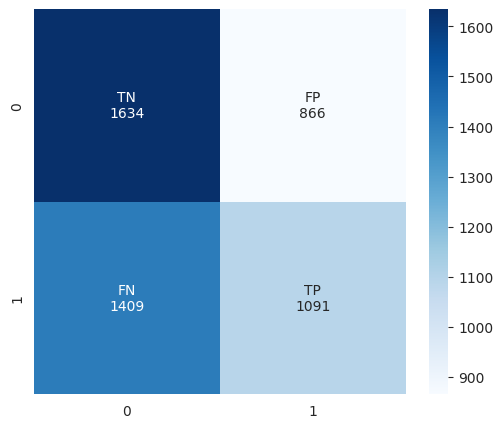

In [66]:
# naive bayes
nb = naive_bayes.MultinomialNB()
# pipeline
model_nb = pipeline.Pipeline([("vectorizer", vectorizer),
                           ("classifier", nb)])
# train classifier
model_nb["classifier"].fit(X_train, y_train)
# test
X_test = df_test["text_clean"].values
predicted_nb = model_nb.predict(X_test)

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values

# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted_nb)
print("Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted_nb))


#validatoion prediction
val_predicted_nb = model_nb.predict(val_text)

classes = np.unique(val_label)
val_label_array = pd.get_dummies(val_label, drop_first=False).values

# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(val_label, val_predicted_nb)
print("Val Accuracy:",  round(accuracy,2))
print("val Detail:")
print(metrics.classification_report(val_label, val_predicted_nb))

cnf_matrix = confusion_matrix(val_label,val_predicted_nb)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(6,5))
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

Accuracy: 0.89
Detail:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     18990
           1       0.89      0.87      0.88     16938

    accuracy                           0.89     35928
   macro avg       0.89      0.89      0.89     35928
weighted avg       0.89      0.89      0.89     35928

Val Accuracy: 0.65
val Detail:
              precision    recall  f1-score   support

           0       0.60      0.86      0.71      2500
           1       0.76      0.43      0.55      2500

    accuracy                           0.65      5000
   macro avg       0.68      0.65      0.63      5000
weighted avg       0.68      0.65      0.63      5000



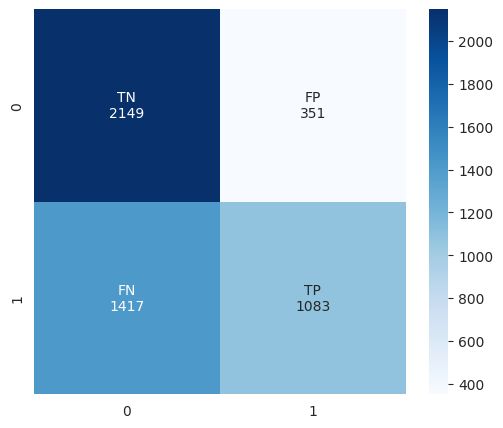

In [67]:
# logistic regression
lr = LogisticRegression(solver='liblinear')
# pipeline
model_lr = pipeline.Pipeline([("vectorizer", vectorizer),
                           ("classifier", lr)])
# train classifier
model_lr["classifier"].fit(X_train, y_train)
# test
X_test = df_test["text_clean"].values
predicted_lr = model_lr.predict(X_test)

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values

# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted_lr)
print("Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted_lr))


#validation set
val_predicted_lr = model_lr.predict(val_text)

classes = np.unique(val_label)
val_label_array = pd.get_dummies(val_label, drop_first=False).values

# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(val_label, val_predicted_lr)
print("Val Accuracy:",  round(accuracy,2))
print("val Detail:")
print(metrics.classification_report(val_label, val_predicted_lr))


cnf_matrix = confusion_matrix(val_label,val_predicted_lr)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(6,5))
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

[LightGBM] [Info] Number of positive: 39468, number of negative: 44361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 3.467287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1677414
[LightGBM] [Info] Number of data points in the train set: 83829, number of used features: 9984
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.470816 -> initscore=-0.116870
[LightGBM] [Info] Start training from score -0.116870
Accuracy: 0.79
Detail:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     18990
           1       0.74      0.85      0.79     16938

    accuracy                           0.79     35928
   macro avg       0.79      0.79      0.79     35928
weighted avg       0.80      0.79      0.79     35928

Val Accuracy: 0.6
val Detail:
              precision    recall  f1-score   support

  

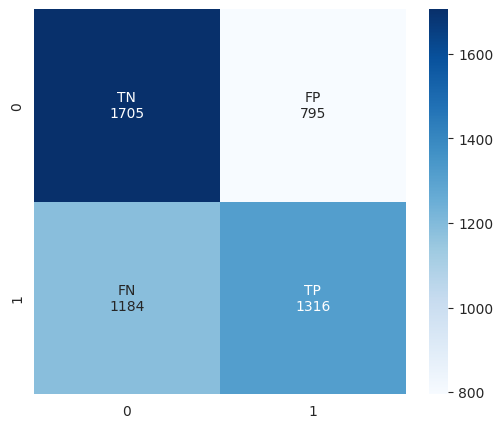

In [68]:
lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
model_lgb = pipeline.Pipeline([("vectorizer", vectorizer),
                           ("classifier", lgb_clf)])
model_lgb["classifier"].fit(X_train, y_train)
# test
X_test = df_test["text_clean"].values
predicted_lgb = model_lgb.predict(X_test)

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values

# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted_lgb)
print("Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted_lgb))

#validation set
val_predicted_lgb = model_lgb.predict(val_text)

classes = np.unique(val_label)
val_label_array = pd.get_dummies(val_label, drop_first=False).values

# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(val_label, val_predicted_lgb)
print("Val Accuracy:",  round(accuracy,2))
print("val Detail:")
print(metrics.classification_report(val_label, val_predicted_lgb))

cnf_matrix = confusion_matrix(val_label,val_predicted_lgb)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(6,5))
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

In [69]:
!pip install xgboost

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [15:45:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "feature_fraction" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.92
Detail:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     18990
           1       0.91      0.91      0.91     16938

    accuracy                           0.92     35928
   macro avg       0.92      0.92      0.92     35928
weighted avg       0.92      0.92      0.92     35928

Val Accuracy: 0.67
val Detail:
              precision    recall  f1-score   support

           0       0.62      0.89      0.73      2500
           1       0.80      0.46      0.58      2500

    accuracy                           0.67      5000
   macro avg       0.71      0.67      0.66      5000
weighted avg       0.71      0.67      0.66      5000



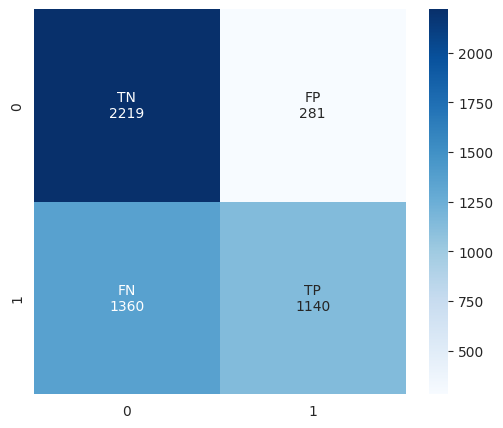

In [70]:
import xgboost

xgb = xgboost.XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=10,
    feature_fraction=0.7,
    scale_pos_weight=1.5,
    objective='binary:logistic',  # Set objective to binary logistic for binary classification
    eval_metric='logloss'  # Use log loss as the evaluation metric
)
model_xgb = pipeline.Pipeline([("vectorizer", vectorizer),
                           ("classifier", xgb)])
# train classifier
model_xgb["classifier"].fit(X_train, y_train)
# test
X_test = df_test["text_clean"].values
predicted_xgb = model_xgb.predict(X_test)

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values

# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted_xgb)
print("Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted_xgb))

#validation set
val_predicted_xgb = model_xgb.predict(val_text)

classes = np.unique(val_label)
val_label_array = pd.get_dummies(val_label, drop_first=False).values

# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(val_label, val_predicted_xgb)
print("Val Accuracy:",  round(accuracy,2))
print("val Detail:")
print(metrics.classification_report(val_label, val_predicted_xgb))

cnf_matrix = confusion_matrix(val_label,val_predicted_xgb)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(6,5))
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

Accuracy: 0.8
Detail:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     18990
           1       0.75      0.85      0.80     16938

    accuracy                           0.80     35928
   macro avg       0.80      0.80      0.80     35928
weighted avg       0.80      0.80      0.80     35928

Val Accuracy: 0.6
val Detail:
              precision    recall  f1-score   support

           0       0.59      0.69      0.63      2500
           1       0.62      0.51      0.56      2500

    accuracy                           0.60      5000
   macro avg       0.60      0.60      0.60      5000
weighted avg       0.60      0.60      0.60      5000



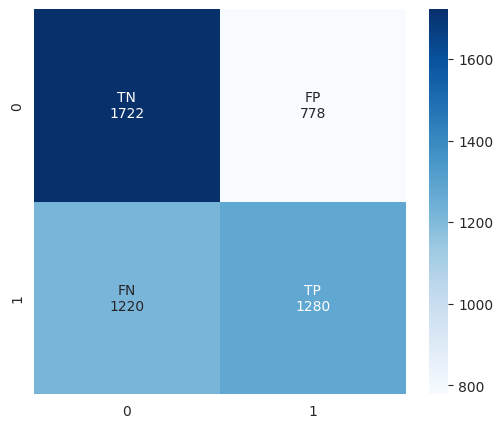

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)

## pipeline
model_rf = pipeline.Pipeline([("vectorizer", vectorizer),
                           ("rf", rf)])

## train classifier
model_rf["rf"].fit(X_train, y_train)
## test
X_test = df_test["text_clean"].values
predicted_rf = model_rf.predict(X_test)

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values

## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted_rf)
print("Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted_rf))

#validation set
val_predicted_rf = model_rf.predict(val_text)

classes = np.unique(val_label)
val_label_array = pd.get_dummies(val_label, drop_first=False).values

# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(val_label, val_predicted_rf)
print("Val Accuracy:",  round(accuracy,2))
print("val Detail:")
print(metrics.classification_report(val_label, val_predicted_rf))

cnf_matrix = confusion_matrix(val_label,val_predicted_rf)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(6,5))
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

Accuracy: 0.71
Detail:
              precision    recall  f1-score   support

           0       0.72      0.73      0.73     18990
           1       0.69      0.68      0.69     16938

    accuracy                           0.71     35928
   macro avg       0.71      0.71      0.71     35928
weighted avg       0.71      0.71      0.71     35928

Val Accuracy: 0.54
val Detail:
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      2500
           1       0.54      0.52      0.53      2500

    accuracy                           0.54      5000
   macro avg       0.54      0.54      0.54      5000
weighted avg       0.54      0.54      0.54      5000



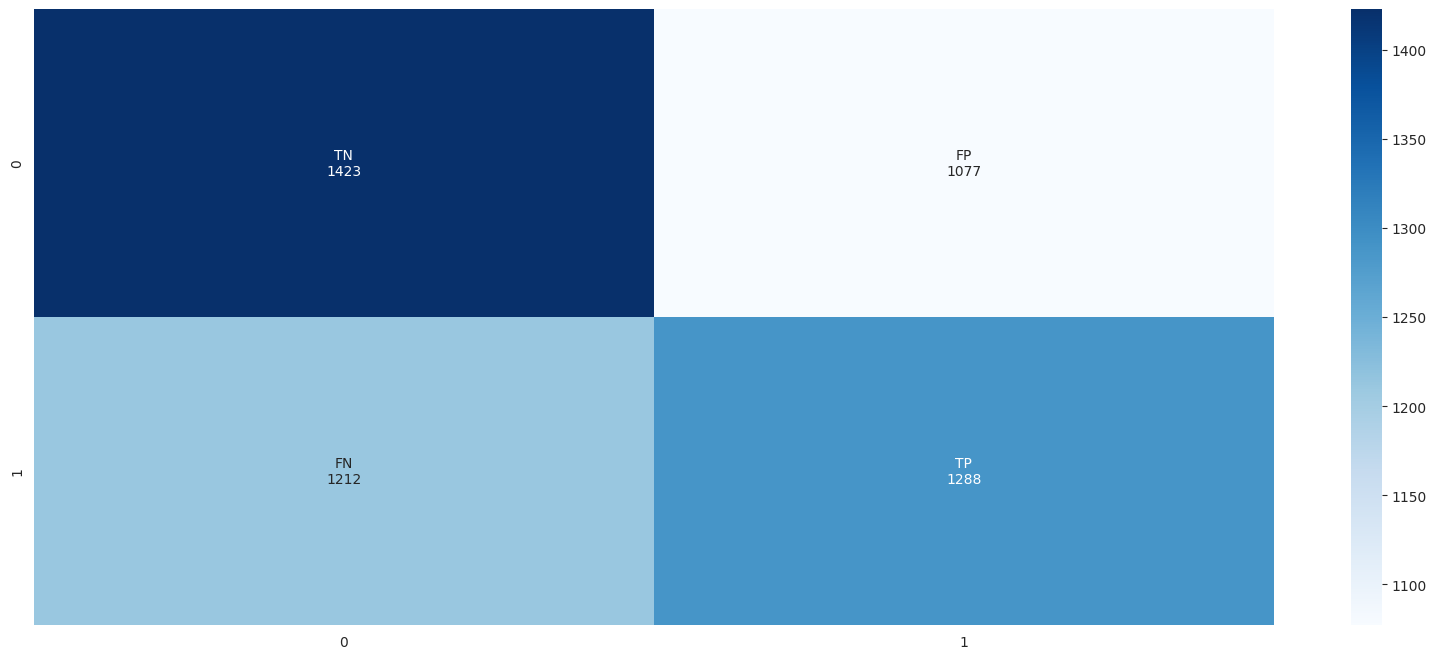

In [73]:
knn = KNeighborsClassifier(n_neighbors=100)
model_knn = pipeline.Pipeline([("vectorizer", vectorizer),
                           ("classifier", knn)])
# train classifier
model_knn["classifier"].fit(X_train, y_train)
# test
X_test = df_test["text_clean"].values
predicted_knn = model_knn.predict(X_test)

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values

# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, predicted_knn)
print("Accuracy:",  round(accuracy,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted_knn))

#validation set
val_predicted_knn = model_knn.predict(val_text)

classes = np.unique(val_label)
val_label_array = pd.get_dummies(val_label, drop_first=False).values

# Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(val_label, val_predicted_knn)
print("Val Accuracy:",  round(accuracy,2))
print("val Detail:")
print(metrics.classification_report(val_label, val_predicted_knn))

cnf_matrix = confusion_matrix(val_label,val_predicted_knn)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

# Conclusion

After being trained in 5 different algorithms, the best results are shown by the XGboost algorithm with 92% accuracy.

<ipython-input-75-6247ec5da958>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)


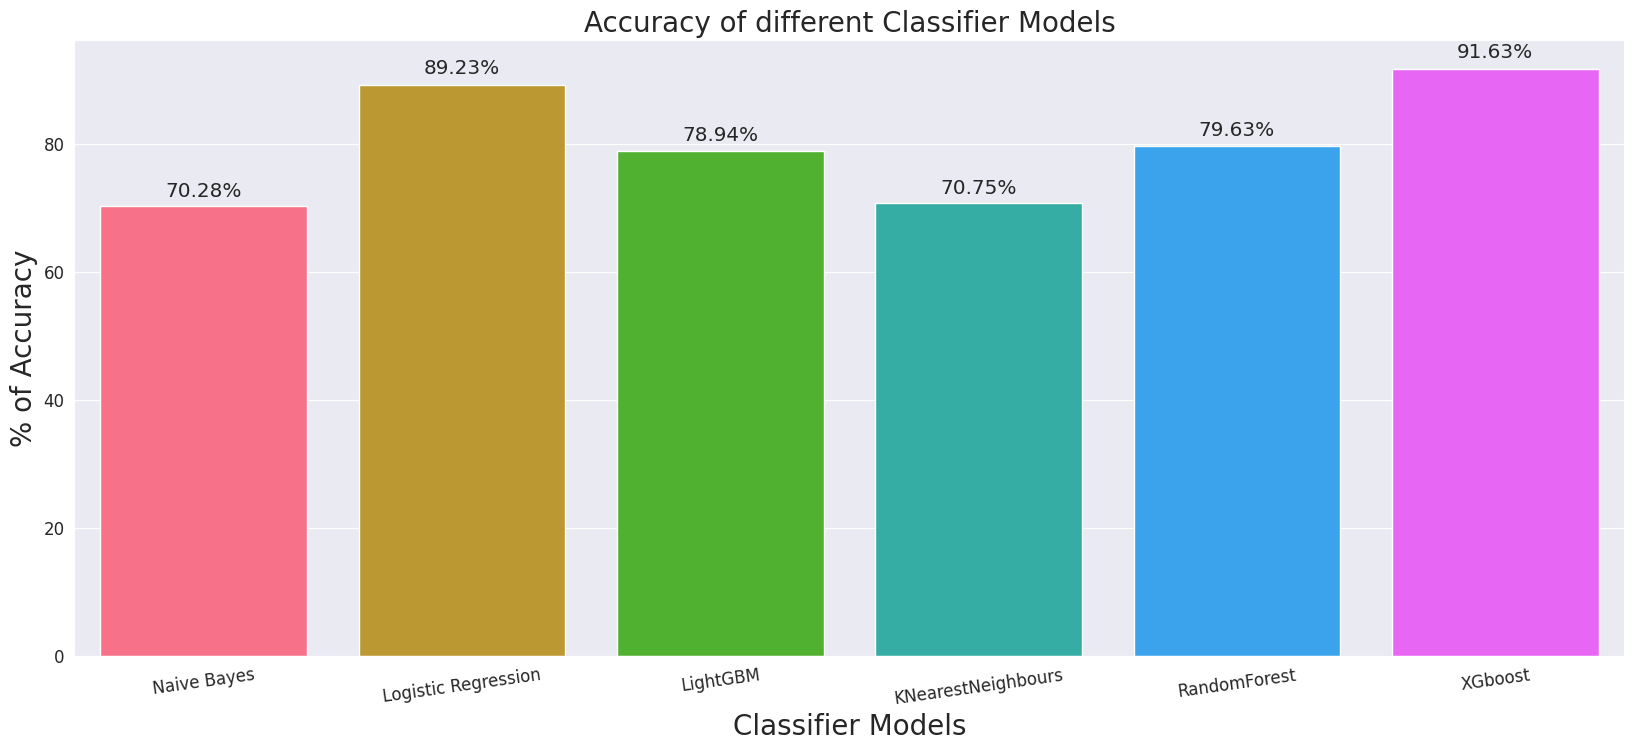

In [75]:
model_list = ['Naive Bayes', 'Logistic Regression', 'LightGBM','KNearestNeighbours', 'RandomForest', 'XGboost']
accuracy_list = [(metrics.accuracy_score(y_test, predicted_nb)*100), (metrics.accuracy_score(y_test, predicted_lr)*100),
                 (metrics.accuracy_score(y_test, predicted_lgb)*100), (metrics.accuracy_score(y_test, predicted_knn)*100),
               (metrics.accuracy_score(y_test, predicted_rf)*100), (metrics.accuracy_score(y_test, predicted_xgb)*100)]
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()